In [35]:
import pandas as pd
import numpy as np

In [36]:
annotImg = pd.read_csv("D:/work/work_DL2/object_detection/data/annotations.csv")
annotImg.head()

,image,xmin,ymin,xmax,ymax,label
0,image-100.png,0.000000,0.000000,25.190198,40.816803,rbc
1,image-100.png,15.010502,0.000000,68.337223,23.527421,rbc
2,image-100.png,25.017503,16.021004,78.374562,73.735123,rbc
3,image-100.png,75.565928,1.061844,140.248541,45.591599,rbc
4,image-100.png,77.483081,23.290548,131.936989,74.806301,rbc


In [37]:
annotImg.shape

(2340, 6)

In [38]:
images_data = annotImg.image.unique()

In [39]:
train_img = images_data[:84]
test_img = images_data[84:]

In [40]:
import os

In [41]:
train_dir = "D:/work/work_DL2/object_detection/prepared_data/train"
test_dir = "D:/work/work_DL2/object_detection/prepared_data/test"

In [42]:
for edir in [train_dir, test_dir]:
    for data in ["images", "labels"]:
        print(os.path.join(edir, data))
        os.makedirs(os.path.join(edir, data), exist_ok=True)

D:/work/work_DL2/object_detection/prepared_data/train\images
D:/work/work_DL2/object_detection/prepared_data/train\labels
D:/work/work_DL2/object_detection/prepared_data/test\images
D:/work/work_DL2/object_detection/prepared_data/test\labels


In [43]:
import glob
from tqdm import tqdm
import os
import cv2
import matplotlib.pyplot as plt

(256, 256, 3)


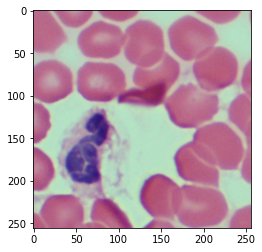

In [44]:
image = cv2.imread('D:/work/work_DL2/object_detection/data/images/image-7.png')
image = image[:,:,2::-1]
print(image.shape)
plt.imshow(image)

In [45]:
WIDTH = 256
HEIGHT = 256
cells_id = {
    'rbc': 0,
    'wbc': 1
}

In [46]:
cells_classes = list(cells_id.keys())
cells_classes

['rbc', 'wbc']

In [47]:
for image in train_img:
    lables_file = os.path.join(train_dir, 'labels', image.replace(".png", ".txt"))
    with open(lables_file, "w") as wobj:
        for box in annotImg.loc[annotImg.image == image].values:
            wobj.write("%d %f %f %f %f \n" % (
                cells_id[box[5]],
                ((box[3]+box[1])/2.0) / WIDTH,
                ((box[4]+box[2])/2.0) / HEIGHT,
                (box[3]-box[1]) / WIDTH,
                (box[4]-box[2]) / HEIGHT
            ))

In [48]:
for image in test_img:
    labels_file = os.path.join(test_dir, 'labels', image.replace(".png", ".txt"))
    with open(labels_file, "w") as wobj:
        for box in annotImg.loc[annotImg.image == image].values:
            wobj.write("%d %f %f %f %f \n" % (
                cells_id[box[5]],
                ((box[3]+box[1])/2.0) / WIDTH,
                ((box[4]+box[2])/2.0) / HEIGHT,
                (box[3]-box[1]) / WIDTH,
                (box[4]-box[2]) / HEIGHT
            ))

In [49]:
SIZE_W = 640
SIZE_H = 640

In [50]:
SIZE = (SIZE_W, SIZE_H)

def replace_image(src_file, dst_file, size=SIZE):
    image = cv2.imread(src_file) 
    image = cv2.resize(image, size)
    cv2.imwrite(dst_file, image)

In [51]:
all_images_dir = "D:/work/work_DL2/object_detection/data/images"

for image in train_img:
    src_file = os.path.join(all_images_dir , image)
    dst_file = os.path.join(train_dir, 'images', image)
    replace_image(src_file, dst_file)
        
for image in test_img:
    src_file = os.path.join(all_images_dir , image)
    dst_file = os.path.join(test_dir, 'images', image)
    replace_image(src_file, dst_file)